In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## I take comfort in knowing the time you take to read this is as wasteful as the time it took for me to make this

### Brainstorming the important questions:

1. How many times was "apes together strong" used?
2. How many times is "retard" used?
3. How many mentions are there of GME, AMC, NOK?
4. TO THE MOON?
5. Dogecoin analysis
6. 420 and 69 analysis
7. How many times is "autist" mentioned?
8. Is this dataset large enough?
9. Key words to search: "Citadel", "fucker", "SEC", "short", "poor", "hype", "food stamps", "Melvin"
10. 0 score analysis
11. top score analysis
12. How much more "retarded" did the posts get over time? (Will have to re-arrange timestamps to show linear time.)
13. Diamond hands vs paper hands analysis
14. How many non-financial advisors are there who like the stock? ("I am not a financial advisor" & "I like the stock")
15. Hold the line - how many occurences of "Hold" was there? Over time?
16. YOLO analysis

## First we analyze the data

In [ ]:
df_apes = pd.read_csv (r'../input/reddit-wallstreetsbets-posts/reddit_wsb.csv')

In [ ]:
df_apes

## The raw data, like all data, is a turd I must polish. I will make the following decisions to the data to better understand it. Per .info(), we have 32,204 rows.
1. Remove "created" column. It serves no purpose. Probably the creation time of the scraper. 
2. "id" column serves no purpose because len(df_apes_1.id.unique()) = 32,204. Removing "id" column

In [ ]:
df_apes_1 = df_apes.drop(['created', 'id'], axis=1)

In [ ]:
df_apes_1.head()

## Keyword Analysis in title column

In [ ]:
# I will look for occurences of the following: ["Citadel", "fucker", "fuck", "Melvin", "apes", "moon", "short", "poor", "hype", "tendies", "diamond hands", "paper hands"]

keywords = ["Citadel", "fucker", "fuck", "Melvin", "apes", "moon", "short", "poor", "hype", "tendies", "diamond hands", "paper hands", "gme", "amc", "nok", "doge"]
# len(keywords)
#Change all strings in title to lower-case to search easier
df_apes_1['title'].str.lower()

#### Who needs "for" loops when I have tendies?

In [ ]:
Citadel = df_apes_1['title'].str.contains('citadel')
Citadel1 = Citadel.sum()
print('Citadel got:',Citadel1,'occurences')

fucker = df_apes_1['title'].str.contains('fucker')
fucker1 = fucker.sum()
print('fucker got:',fucker1,'occurences')

fuck = df_apes_1['title'].str.contains('fuck')
fuck1 = fuck.sum()
print('fuck got:',fuck1,'occurences')

Melvin = df_apes_1['title'].str.contains('melvin')
Melvin1 = Melvin.sum()
print('Melvin got:',Melvin1,'occurences')

Apes = df_apes_1['title'].str.contains('apes')
Apes1 = Apes.sum()
print('Apes got:',Apes1,'occurences')

Apes2 = df_apes_1['title'].str.contains('apes together strong')
Apes3 = Apes2.sum()
print('Apes together strong:',Apes3,'occurences')

Moon = df_apes_1['title'].str.contains('moon')
Moon1 = Moon.sum()
print('Moon got:',Moon1,'occurences')

Short = df_apes_1['title'].str.contains('short')
Short1 = Short.sum()
print('Short got:',Short1,'occurences')

Poor = df_apes_1['title'].str.contains('poor')
Poor1 = Poor.sum()
print('Poor got:',Poor1,'occurences')

Hype = df_apes_1['title'].str.contains('hype')
Hype1 = Hype.sum()
print('Hype got:',Hype1,'occurences')

Tendies = df_apes_1['title'].str.contains('Tendies')
Tendies1 = Tendies.sum()
print('Tendies got:',Tendies1,'occurences')

Diamondhands = df_apes_1['title'].str.contains('diamond hands')
Diamondhands1 = Diamondhands.sum()
print('Diamond hands got:',Diamondhands1,'occurences')

Paperhands = df_apes_1['title'].str.contains('paper hands')
Paperhands1 = Paperhands.sum()
print('Paper hands got:',Paperhands1,'occurences')

Retard = df_apes_1['title'].str.contains('retard')
Retard1 = Retard.sum()
print('Retard got:',Retard1,'occurences')

Autist = df_apes_1['title'].str.contains('autist')
Autist1 = Autist.sum()
print('Autist got:',Autist1,'occurences')

Gme = df_apes_1['title'].str.contains('gme')
Gme1 = Gme.sum()
print('Gme got:',Gme1,'occurences')

amc = df_apes_1['title'].str.contains('amc')
amc1 = amc.sum()
print('amc got:',amc1,'occurences')

nok = df_apes_1['title'].str.contains('nok')
nok1 = nok.sum()
print('nok got:',nok1,'occurences')

doge = df_apes_1['title'].str.contains('doge')
doge1 = doge.sum()
print('doge got:',doge1,'occurences')

In [ ]:
title_keyword_sum_list = [Citadel1,fucker1,fuck1,Melvin1,Apes1,Apes3,Moon1,Short1,Poor1,Hype1,Tendies1,Diamondhands1,Paperhands1,Retard1,Autist1, Gme1, amc1,nok1,doge1]
# sum(title_keyword_sum_list)
#3789 is sum of the total keywords in titles
# title_keyword_sum_list

In [ ]:
data = title_keyword_sum_list
labellz = ['Citadel','fucker','fuck','Melvin','Apes','Apes together strong','Moon','Short','Poor','Hype','Tendies','Diamondhands','Paperhands','Retard','Autist', 'GME', 'AMC','NOK','Doge']
fig = plt.figure(figsize =(15, 15)) 
plt.pie(data, labels = labellz, autopct='%1.0f%%')

In [ ]:
title_keyword_sum_list1 = title_keyword_sum_list
title_keyword_sum_list1.sort()
title_keyword_sum_list1

### Upon analysis of the titles with our chosen keywords, we see that the following are top 5 (in order):
1. Short
2. Fuck
3. Moon
4. Retard
5. GME

## Keyword analysis in "body" column.

In [ ]:
df_apes_1['body'].str.lower()

In [ ]:
Citadel = df_apes_1['body'].str.contains('citadel')
Citadel1 = Citadel.sum()
print('Citadel got:',Citadel1,'occurences')

fucker = df_apes_1['body'].str.contains('fucker')
fucker1 = fucker.sum()
print('fucker got:',fucker1,'occurences')

fuck = df_apes_1['body'].str.contains('fuck')
fuck1 = fuck.sum()
print('fuck got:',fuck1,'occurences')

Melvin = df_apes_1['body'].str.contains('melvin')
Melvin1 = Melvin.sum()
print('Melvin got:',Melvin1,'occurences')

Apes = df_apes_1['body'].str.contains('apes')
Apes1 = Apes.sum()
print('Apes got:',Apes1,'occurences')

Apes2 = df_apes_1['body'].str.contains('apes together strong')
Apes3 = Apes2.sum()
print('Apes together strong:',Apes3,'occurences')

Moon = df_apes_1['body'].str.contains('moon')
Moon1 = Moon.sum()
print('Moon got:',Moon1,'occurences')

Short = df_apes_1['body'].str.contains('short')
Short1 = Short.sum()
print('Short got:',Short1,'occurences')

Poor = df_apes_1['body'].str.contains('poor')
Poor1 = Poor.sum()
print('Poor got:',Poor1,'occurences')

Hype = df_apes_1['body'].str.contains('hype')
Hype1 = Hype.sum()
print('Hype got:',Hype1,'occurences')

Tendies = df_apes_1['body'].str.contains('Tendies')
Tendies1 = Tendies.sum()
print('Tendies got:',Tendies1,'occurences')

Diamondhands = df_apes_1['body'].str.contains('diamond hands')
Diamondhands1 = Diamondhands.sum()
print('Diamond hands got:',Diamondhands1,'occurences')

Paperhands = df_apes_1['body'].str.contains('paper hands')
Paperhands1 = Paperhands.sum()
print('Paper hands got:',Paperhands1,'occurences')

Retard = df_apes_1['body'].str.contains('retard')
Retard1 = Retard.sum()
print('Retard got:',Retard1,'occurences')

Autist = df_apes_1['body'].str.contains('autist')
Autist1 = Autist.sum()
print('Autist got:',Autist1,'occurences')

Gme = df_apes_1['body'].str.contains('gme')
Gme1 = Gme.sum()
print('Gme got:',Gme1,'occurences')

amc = df_apes_1['body'].str.contains('amc')
amc1 = amc.sum()
print('amc got:',amc1,'occurences')

nok = df_apes_1['body'].str.contains('nok')
nok1 = nok.sum()
print('nok got:',nok1,'occurences')

doge = df_apes_1['body'].str.contains('doge')
doge1 = doge.sum()
print('doge got:',doge1,'occurences')

In [ ]:
body_keyword_sum_list = [Citadel1,fucker1,fuck1,Melvin1,Apes1,Apes3,Moon1,Short1,Poor1,Hype1,Tendies1,Diamondhands1,Paperhands1,Retard1,Autist1, Gme1,amc1,nok1,doge1]
sum(body_keyword_sum_list)
#11214 is sum of the total keywords in titles
body_keyword_sum_list

In [ ]:
data = body_keyword_sum_list
labellz = ['Citadel','fucker','fuck','Melvin','Apes','Apes together strong','Moon','Short','Poor','Hype','Tendies','Diamondhands','Paperhands','Retard','Autist', 'GME', 'AMC','NOK','Doge']
fig = plt.figure(figsize =(15, 15)) 
plt.pie(data, labels = labellz, autopct='%1.0f%%')

### Analysis of keywords in "body" column
#### The top 5 occurences of keywords in "body" has been:
1. Short - 2920 occurences
2. fuck - 2685 occurences
3. retard - 1630 occurences
4. moon - 910 occurences
5. gme - 588 occurences

#### However, honorable mention:
#### autist - 560 occurences


## 420 and 69 analysis
#### Here we will find out which number trumps the other.

In [ ]:
fourtwenty = df_apes_1['title'].str.contains('420')
fourtwenty1 = fourtwenty.sum()
print('IN TITLE COLUMN - fourtwenty got:',fourtwenty1,'occurences')

sixtynine = df_apes_1['title'].str.contains('69')
sixtynine1 = sixtynine.sum()
print('IN TITLE COLUMN - sixtynine got:',sixtynine1,'occurences')



fourtwenty2 = df_apes_1['body'].str.contains('420')
fourtwenty3 = fourtwenty2.sum()
print('IN BODY COLUMN - fourtwenty got:',fourtwenty3,'occurences')

sixtynine2 = df_apes_1['body'].str.contains('69')
sixtynine3 = sixtynine2.sum()
print('IN BODY COLUMN - sixtynine got:',sixtynine3,'occurences')


total420 = fourtwenty1 + fourtwenty3
total69 = sixtynine1 + sixtynine3
print('Total ocurrences of 420 are: ', total420)
print('Total occurences of  69 are: ', total69)

In [ ]:
data = [273, 594]
labellz = [420, 69]
fig = plt.figure(figsize =(7, 7)) 
plt.pie(data, labels = labellz, autopct='%1.0f%%')

## Very interesting observation of 420 vs. 69

#### It is a damn miracle that 69% of the total occurences of either 420 or 69 was 69. 
#### 69 wins this contest hands down in more ways than just numerical. The universe itself seems to be a degenerate as well. This dataset is an amalgam of degeneracy manifested.

## YOLO analysis + observations 

In [ ]:
yolo2 = df_apes_1['title'].str.contains('YOLO')
yolo3 = yolo2.sum()
print('IN TITLE COLUMN - yolo got:',yolo3,'occurences')

yolo = df_apes_1['body'].str.contains('YOLO')
yolo1 = yolo.sum()
print('IN BODY COLUMN - yolo got:',yolo1,'occurences')

totalyolo = yolo3 + yolo1
print('Total ocurrences of YOLO are: ', totalyolo)

### There are 8 million of you neanderthals in the subreddit and there was only 461 YOLOs? Despicable.

## Paper hands vs. Diamond hands analysis

In [ ]:
Paperhands = df_apes_1['title'].str.contains('paper hands')
Paperhands1 = Paperhands.sum()
print('Paper hands got:',Paperhands1,'occurences')

Diamondhands = df_apes_1['title'].str.contains('diamond hands')
Diamondhands1 = Diamondhands.sum()
print('Diamond hands got:',Diamondhands1,'occurences')

Paperhands2 = df_apes_1['body'].str.contains('paper hands')
Paperhands3 = Paperhands2.sum()
print('Paper hands got:',Paperhands3,'occurences')

Diamondhands2 = df_apes_1['body'].str.contains('diamond hands')
Diamondhands3 = Diamondhands2.sum()
print('Diamond hands got:',Diamondhands3,'occurences')

TOTAL_PAPER_HANDS = Paperhands1 + Paperhands3
TOTAL_DIAMOND_HANDS = Diamondhands1 + Diamondhands3

print('Total ocurrences of Paper Hands are: ', TOTAL_PAPER_HANDS)
print('Total ocurrences of Diamond Hands are: ', TOTAL_DIAMOND_HANDS)

In [ ]:
data = [245, 445]
labellz = ['Paper hands', 'Diamond Hands']
fig = plt.figure(figsize =(7, 7)) 
plt.pie(data, labels = labellz, autopct='%1.0f%%')

### Upon analysis of paper hands vs diamond hands, we see that Diamond hands are in the lead. 
#### My only sadness here is that Diamond hands percent is not 69%

## How many are not financial advisors and like the stock?

In [ ]:
likedastock2 = df_apes_1['title'].str.contains('like the stock')
likedastock3 = likedastock2.sum()
print('like the stock :',likedastock3,'occurences')

likedastock = df_apes_1['body'].str.contains('like the stock')
likedastock1 = likedastock.sum()
print('like the stock:',likedastock1,'occurences')

TOTAL_STOCK_LIKING_APES = likedastock3 + likedastock1
print('Total stock liking apes: ', TOTAL_STOCK_LIKING_APES)

In [ ]:
notafinancialadvisor = df_apes_1['title'].str.contains('not a financial advisor')
notafinancialadvisor1 = notafinancialadvisor.sum()
print('not a financial advisor in body :',notafinancialadvisor1,'occurences')

notafinancialadvisor2 = df_apes_1['body'].str.contains('not a financial advisor')
notafinancialadvisor3 = notafinancialadvisor2.sum()
print('not a financial advisor in titles:',notafinancialadvisor3,'occurences')

TOTAL_NON_FINANCIAL_ADVISORS = notafinancialadvisor1 + notafinancialadvisor3
print('Total non-financial advisors: ', TOTAL_NON_FINANCIAL_ADVISORS)

### I'm too lazy to figure out the intersection of these two data. However, the number is still surprisingly low amongst the posts. 

## "Hold" analysis

In [ ]:
hold = df_apes_1['title'].str.contains('hold')
hold1 = hold.sum()
print('hold :',hold1,'occurences')

hold2 = df_apes_1['body'].str.contains('hold')
hold3 = hold2.sum()
print('hold:',hold3,'occurences')

TOTAL_BAG_HOLDERS = hold1 + hold3
print('Total bag holders: ', TOTAL_BAG_HOLDERS)

### There we go, 4885 bag holders.

## 0 score analysis and top score analysis
##### I'm going to skip this because I don't care. Let me clarify. I don't care because it doesn't matter what the score is. Every single poster in that subreddit is a degenerate. Doesn't matter if it is 0 score or 42069 score...........hmmmmm....now im curious

## Analysis of 420 and 69 in scores

In [ ]:
num420 = (df_apes_1['score'] == 420)
df_apes_1[num420]

In [ ]:
pd.set_option('display.max_rows', None)
num69 = (df_apes_1['score'] == 69)
df_apes_1[num69]

In [ ]:
# num42069 = (df_apes_1['score'] == 42069)
# df_apes_1[num42069]
# I got zero rows

# num69420 = (df_apes_1['score'] == 69420)
# df_apes_1[num69420]
# I got zero rows

### As we see above:
1. There were 3 posts with 420 comment score.
2. There were 65 posts with 69 comment score. 
3. There were 0 posts with 42069 or 69420 score

### It looks like 69 is a magical number, not only 69% of 420/69 occurences is 69, but also 69 comment score is more prevalent than 420 comment score.
#### Yo dawg...
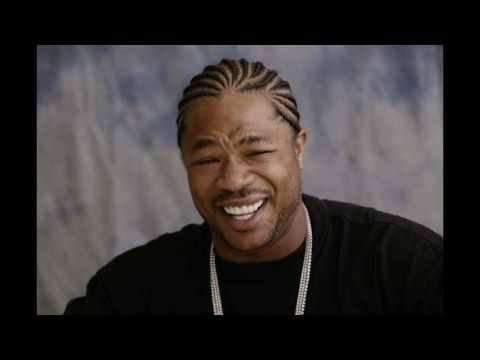

## Final Summary and Recommendations
##### Why are you here? You could've done anything better with your time.

### Summary of observations: 
1. The top 5 occurences of keywords were basically the same either from the "title" column or the "body" column
     * These keywords were: short, fuck, moon, retard, gme
     * "Autist" was an honorable mention, right under GME at 588 occurences in the "body" column
2. Diamond hands were 64% and paper hands were 36%. This means there are 1.7 times more diamond handers than paper handers.
3. There were only 461 YOLO'ers from a community of 8 million apes.
     * However, there was a total number of 4885 bag holders. 
4. Out of 32k posts, 3 had "420" score and 65 had "69" score. 
     * There are NO posts with either "42069" or "69420" score
5. When comparing 420 or 69 in both body and title columns:
     * "69" was 69% of the total occurences of both 420 and 69. 


### Recommendations

1. There needs to be more 420 score posts. The posts have to get danker. 
2. More people need to become "diamond hands" in order to hit 69% of total diamond hands vs paper hands.
    * About 5% more effort will yield this result
3. The five top key words can be rearranged into different combinations (with some fillers to assist understanding) which might yield fruitful insights of the sentiments    of the apes in the subreddit. Again, I don't have all the time or energy to find all combinations but these are some that come to mind:
    * Some examples are: 
        *   (Don't) short GME (you) fuck(ing) retard
        *    GME (to the) moon
        *    Short retard(s) fuck GME (to the) moon
4. We need to take a poll of all bag holders to see the true percentage of bag holders who are YOLO'ers. 
5. Seriously, what the hell are you doing still reading this? Fix your life you degen.
    

### Future Work

1. Re-run all this analysis on 1 yr of scraped WSB data. Also, try from the beginning of WSB's creation.
2. Create a ML bot that posts statements after going through every WSB post/body content
3. Scrape and analyze all memes to see which ones survived time in the WSB jungle.
4. Create a bot that paper-trades (or real trades) based on the trade history of WSB users
5. Compare scrotum sizes of "diamond hands" vs. "paper hands"

## Closing thoughts:

#### I don't have thoughts anymore. My brain was losing its wrinkles ever since I exposed myself to this data. I lost IQ most definetly from start to end of this analysis. I feel dumb, angry, and I want my time back. 

#### With that being said, like an ancient Roman that partied with sugar of lead, I had fun. 

